# Word Representation

### One Hot Vector를 통한 출력

In [81]:
from konlpy.tag import Mecab

qna_data = [
                ['안녕', '만나서 반가워']
                ,['넌누구니', '나는 AI 봇이란다.']
                 ,['피자 주문 할께', '음료도 주문해줘']
                ,['음료는 멀로', '콜라로 해줘']
            ]
mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

train_data = list(map(lambda x : mecab.morphs(' '.join(x)) , qna_data))

import itertools
train_data = list(itertools.chain.from_iterable(train_data))

print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '멀', '로', '콜라', '로', '해', '줘']


In [82]:
import numpy as np
bucket = np.zeros(len(train_data), dtype=np.float)

for word in train_data :
    bucket_temp = bucket.copy()
    np.put(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.

## Word to Vector (By Gensim)
### W2V를 통해 출력해보자

In [83]:
from gensim.models import word2vec

In [84]:
train_data = [train_data]
print(train_data)

model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data)
print("model check : {0}".format(model))

[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '멀', '로', '콜라', '로', '해', '줘']]
model check : Word2Vec(vocab=24, size=50, alpha=0.025)


In [85]:
import os  
file_path = './model'
if not os.path.exists(file_path):
    os.makedirs(file_path)
model.save(file_path + "/w2v.bin")
model = word2vec.Word2Vec.load("./model/w2v.bin")
print("model load check : {0}".format(model))

model load check : Word2Vec(vocab=24, size=50, alpha=0.025)


In [86]:
X = model[vocab]
print(model.wv.index2word)

['음료', '줘', '해', '는', '주문', '로', '서', '.', '나', '만나', '니', '반가워', 'AI', '봇', '이', '넌', '할께', '안녕', '란다', '누구', '콜라', '피자', '도', '멀']


### 안녕, AI등 값의 Vector값 출력 

In [87]:
print(model['안녕'])

[  7.70578021e-03  -5.53146517e-03  -6.92201126e-03  -2.27350509e-03
  -7.25358166e-03  -3.65838991e-03   8.86415318e-03   2.15791957e-03
   1.30950264e-03   7.31933815e-03  -1.18540879e-03  -9.31307487e-03
   6.56629913e-04  -2.58653285e-03   4.41709626e-03   2.39771931e-03
  -7.02373823e-03   6.34479802e-03   7.52461329e-03  -8.82939436e-03
  -9.02117789e-03   7.92329479e-03   7.50020699e-05   4.99623548e-03
   5.54782385e-03  -1.45250314e-03   2.13032239e-03  -9.50409472e-03
  -5.05588809e-03  -3.81429726e-03  -4.80848877e-03  -3.96375963e-03
   7.98807200e-03   4.49646311e-03  -5.40447468e-03   1.51464040e-03
   2.80768843e-03   2.68139155e-03   2.86319805e-03  -4.66718478e-03
  -9.39708855e-03   8.22522503e-04   8.19624774e-03  -1.39889913e-03
  -1.40531920e-04  -8.96323472e-03   6.94040488e-03  -2.65200855e-03
   5.67782810e-03  -5.60363103e-03]


In [88]:
print(model['AI'])

[ 0.00686154  0.00361068  0.00741995  0.00170702 -0.00885591  0.00929839
  0.00695414  0.00986024 -0.00857869 -0.0059921   0.00883905  0.00743784
  0.00091376  0.0012838  -0.00613861 -0.00601931  0.00947428 -0.0049699
  0.00472253  0.00368309 -0.00909072  0.00296947  0.00167912  0.00073072
  0.00299315 -0.00926693  0.00218145  0.00569272  0.00465171  0.00474436
 -0.00436316 -0.0057118   0.00066927 -0.00694768  0.00813383 -0.00635307
  0.00345884 -0.00908514 -0.00155862  0.00322275 -0.0075618   0.00798893
  0.006153   -0.0021826   0.00152068 -0.00950876 -0.0058475   0.00594261
  0.00286639 -0.0001673 ]


In [89]:
result1 = model.most_similar(positive='누구', negative='', topn=10)
print(result1)

[('멀', 0.3275527358055115), ('AI', 0.2745295464992523), ('나', 0.2217162847518921), ('만나', 0.218133807182312), ('할께', 0.1292283535003662), ('음료', 0.08259749412536621), ('도', 0.08101271837949753), ('는', 0.06811986863613129), ('해', 0.05928724631667137), ('이', 0.05255215987563133)]


           x         y word
0  -0.000014  0.000128   음료
1  -0.000102 -0.000018    줘
2  -0.000098 -0.000030    해
3  -0.000156 -0.000074    는
4  -0.000023 -0.000035   주문
5   0.000140 -0.000050    로
6  -0.000157 -0.000004    서
7   0.000093  0.000073    .
8   0.000018  0.000022    나
9  -0.000111 -0.000008   만나
10 -0.000099  0.000034    니
11 -0.000150  0.000047  반가워
12  0.000047  0.000060   AI
13  0.000040  0.000027    봇
14 -0.000044  0.000077    이
15  0.000175  0.000020    넌
16 -0.000127 -0.000007   할께
17 -0.000054 -0.000007   안녕
18  0.000006 -0.000124   란다
19  0.000017  0.000025   누구
20 -0.000151  0.000064   콜라
21 -0.000071  0.000076   피자
22 -0.000109 -0.000131    도
23  0.000145 -0.000087    멀


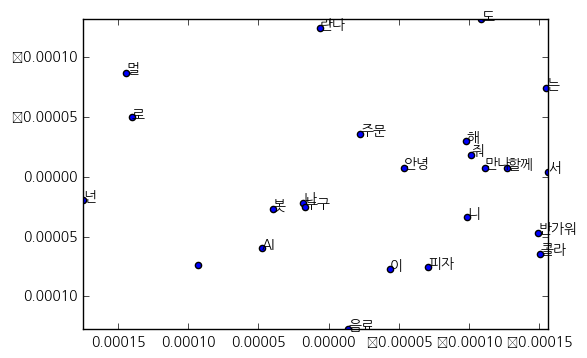

In [90]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt


font_name = matplotlib.font_manager.FontProperties(
                fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 위치를 넣어주세요
            ).get_name()
vocab = model.wv.index2word
matplotlib.rc('font', family=font_name)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) #t-분포 확률적 임베딩(t-SNE)은 데이터의 차원 축소에 사용
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()